### retrieving the data and saving them as CSV file 

In [9]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import emoji



# Read the text file into a DataFrame
df_demo = pd.read_csv('../Data/Raw data/df_final_demo (1).txt', delimiter=',', header=0)
df_web_data1 = pd.read_csv('../Data/Raw data/df_final_web_data_pt_1.txt', delimiter=',', header=0)
df_web_data2 = pd.read_csv('../Data/Raw data/df_final_web_data_pt_2.txt', delimiter=',', header=0)
df_experiment_clients = pd.read_csv('../Data/Raw data/df_final_experiment_clients.txt', delimiter=',', header=0)




ModuleNotFoundError: No module named 'emoji'

#### 1- Load and Inspect Data

In [ ]:
# Display the first few rows of each dataframe to understand their structure
df_demo



client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
70604    7993686             4.0              56.0      38.5     U        3.0   
70605    8981690            12.0             148.0      31.0     M        2.0   
70606     333913            16.0             198.0      61.5     F        2.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F        3.0   

              bal  calls_6_mnth  logons_6_mnth  
0        45105.30           6.0            9.0  
1       110860.30           6.0            9.0  
2        52467.79           6.0            9.0  
3        67454.65           3.0            6.0  
4       103671.75           0.0            3.0  
...           ...           ...            ...  
70604  1411062.68           5.0            5.0  
70605   101867.07           6.0            6.0  
70606    40745.00           3.0            3.0  
70607   475114.69           4.0            4.0  
70608   157498.73           7.0            7.0  

[70609 rows x 9 columns]

In [ ]:
df_web_data1

client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
343136    2443347  465784886_73090545671  136329900_10529659391_316129   
343137    2443347  465784886_73090545671  136329900_10529659391_316129   
343138    2443347  465784886_73090545671  136329900_10529659391_316129   
343139    2443347  465784886_73090545671  136329900_10529659391_316129   
343140    2443347  465784886_73090545671  136329900_10529659391_316129   

       process_step            date_time  
0            step_3  2017-04-17 15:27:07  
1            step_2  2017-04-17 15:26:51  
2            step_3  2017-04-17 15:19:22  
3            step_2  2017-04-17 15:19:13  
4            step_3  2017-04-17 15:18:04  
...             ...                  ...  
343136      confirm  2017-03-31 15:15:46  
343137       step_3  2017-03-31 15:14:53  
343138       step_2  2017-03-31 15:12:08  
343139       step_1  2017-03-31 15:11:37  
343140        start  2017-03-31 15:10:47  

[343141 rows x 5 columns]

In [ ]:
df_web_data2

client_id             visitor_id                      visit_id  \
0          763412  601952081_10457207388  397475557_40440946728_419634   
1         6019349  442094451_91531546617  154620534_35331068705_522317   
2         6019349  442094451_91531546617  154620534_35331068705_522317   
3         6019349  442094451_91531546617  154620534_35331068705_522317   
4         6019349  442094451_91531546617  154620534_35331068705_522317   
...           ...                    ...                           ...   
412259    9668240   388766751_9038881013   922267647_3096648104_968866   
412260    9668240   388766751_9038881013   922267647_3096648104_968866   
412261    9668240   388766751_9038881013   922267647_3096648104_968866   
412262    9668240   388766751_9038881013   922267647_3096648104_968866   
412263     674799  947159805_81558194550   86152093_47511127657_716022   

       process_step            date_time  
0           confirm  2017-06-06 08:56:00  
1           confirm  2017-06-01 11:59:27  
2            step_3  2017-06-01 11:58:48  
3            step_2  2017-06-01 11:58:08  
4            step_1  2017-06-01 11:57:58  
...             ...                  ...  
412259        start  2017-05-24 18:46:10  
412260        start  2017-05-24 18:45:29  
412261       step_1  2017-05-24 18:44:51  
412262        start  2017-05-24 18:44:34  
412263        start  2017-06-03 12:17:09  

[412264 rows x 5 columns]

In [ ]:
df_experiment_clients

client_id Variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347       NaN
70605    8788427       NaN
70606     266828       NaN
70607    1266421       NaN
70608    9895983       NaN

[70609 rows x 2 columns]

### 2- Data Cleaning

In [ ]:
# Merging web data1 and webdata2 
df_web_data = pd.concat([df_web_data1, df_web_data2], ignore_index=True)
df_web_data

client_id             visitor_id                      visit_id  \
0         9988021   580560515_7732621733  781255054_21935453173_531117   
1         9988021   580560515_7732621733  781255054_21935453173_531117   
2         9988021   580560515_7732621733  781255054_21935453173_531117   
3         9988021   580560515_7732621733  781255054_21935453173_531117   
4         9988021   580560515_7732621733  781255054_21935453173_531117   
...           ...                    ...                           ...   
755400    9668240   388766751_9038881013   922267647_3096648104_968866   
755401    9668240   388766751_9038881013   922267647_3096648104_968866   
755402    9668240   388766751_9038881013   922267647_3096648104_968866   
755403    9668240   388766751_9038881013   922267647_3096648104_968866   
755404     674799  947159805_81558194550   86152093_47511127657_716022   

       process_step            date_time  
0            step_3  2017-04-17 15:27:07  
1            step_2  2017-04-17 15:26:51  
2            step_3  2017-04-17 15:19:22  
3            step_2  2017-04-17 15:19:13  
4            step_3  2017-04-17 15:18:04  
...             ...                  ...  
755400        start  2017-05-24 18:46:10  
755401        start  2017-05-24 18:45:29  
755402       step_1  2017-05-24 18:44:51  
755403        start  2017-05-24 18:44:34  
755404        start  2017-06-03 12:17:09  

[755405 rows x 5 columns]

In [ ]:
# Checking for missing values and data types in the 3 datasets
missing_values_demo = df_demo.isnull().sum()
data_types_demo = df_demo.dtypes

missing_values_web = df_web_data.isnull().sum()
data_types_web = df_web_data.dtypes

missing_values_experiment = df_experiment_clients.isnull().sum()
data_types_experiment = df_experiment_clients.dtypes

missing_values_demo, data_types_demo, missing_values_web, data_types_web, missing_values_experiment, data_types_experiment



(client_id            0
 clnt_tenure_yr      14
 clnt_tenure_mnth    14
 clnt_age            15
 gendr               14
 num_accts           14
 bal                 14
 calls_6_mnth        14
 logons_6_mnth       14
 dtype: int64,
 client_id             int64
 clnt_tenure_yr      float64
 clnt_tenure_mnth    float64
 clnt_age            float64
 gendr                object
 num_accts           float64
 bal                 float64
 calls_6_mnth        float64
 logons_6_mnth       float64
 dtype: object,
 client_id       0
 visitor_id      0
 visit_id        0
 process_step    0
 date_time       0
 dtype: int64,
 client_id        int64
 visitor_id      object
 visit_id        object
 process_step    object
 date_time       object
 dtype: object,
 client_id        0
 Variation    20109
 dtype: int64,
 client_id     int64
 Variation    object
 dtype: object)

In [ ]:
# Drop rows with missing values in Client demographical Profiles
df_demo_cleaned = df_demo.dropna()

# Drop rows with missing Variation in Experiment Roster
df_experiment_clients_cleaned = df_experiment_clients.dropna(subset=['Variation'])

# Convert date_time to datetime format in Web Data
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])

# Verify the cleaning process
missing_values_demo_cleaned = df_demo_cleaned.isnull().sum()
missing_values_experiment_cleaned = df_experiment_clients_cleaned.isnull().sum()
data_types_web_cleaned = df_web_data.dtypes

missing_values_demo_cleaned, missing_values_experiment_cleaned, data_types_web_cleaned

(client_id           0
 clnt_tenure_yr      0
 clnt_tenure_mnth    0
 clnt_age            0
 gendr               0
 num_accts           0
 bal                 0
 calls_6_mnth        0
 logons_6_mnth       0
 dtype: int64,
 client_id    0
 Variation    0
 dtype: int64,
 client_id                int64
 visitor_id              object
 visit_id                object
 process_step            object
 date_time       datetime64[ns]
 dtype: object)

#### Demographic Analysis
Merging Datasets

In [ ]:
# merging the client demo and the experiment client data
df_merged = pd.merge(df_demo_cleaned, df_experiment_clients_cleaned, on = 'client_id')
df_merged


client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0         836976             6.0              73.0      60.5     U        2.0   
1        2304905             7.0              94.0      58.0     U        2.0   
2        1439522             5.0              64.0      32.0     U        2.0   
3        1562045            16.0             198.0      49.0     M        2.0   
4        5126305            12.0             145.0      33.0     F        2.0   
...          ...             ...               ...       ...   ...        ...   
50482    1780858            21.0             262.0      68.5     M        3.0   
50483    6967120            21.0             260.0      68.5     M        3.0   
50484    5826160            20.0             249.0      56.5     F        2.0   
50485    8739285            19.0             229.0      69.5     F        2.0   
50486    7468138            18.0             222.0      61.0     F        3.0   

              bal  calls_6_mnth  logons_6_mnth Variation  
0        45105.30           6.0            9.0      Test  
1       110860.30           6.0            9.0   Control  
2        52467.79           6.0            9.0      Test  
3        67454.65           3.0            6.0      Test  
4       103671.75           0.0            3.0   Control  
...           ...           ...            ...       ...  
50482   372100.59           6.0            9.0      Test  
50483  4279873.38           6.0            9.0   Control  
50484    44837.16           2.0            5.0      Test  
50485    44994.24           1.0            4.0      Test  
50486   209278.15           0.0            3.0      Test  

[50487 rows x 10 columns]

In [ ]:

# Numerical columns 
# Primary clients demographics
primary_clients_demo = df_merged.describe()

primary_clients_demo

client_id  clnt_tenure_yr  clnt_tenure_mnth      clnt_age  \
count  5.048700e+04    50487.000000      50487.000000  50487.000000   
mean   5.006180e+06       12.031810        150.416365     47.319795   
std    2.877445e+06        6.860326         81.945403     15.518616   
min    5.550000e+02        2.000000         33.000000     17.000000   
25%    2.515688e+06        6.000000         82.000000     33.500000   
50%    5.025043e+06       11.000000        136.000000     48.000000   
75%    7.477922e+06       16.000000        192.000000     59.500000   
max    9.999832e+06       55.000000        669.000000     96.000000   

          num_accts           bal  calls_6_mnth  logons_6_mnth  
count  50487.000000  5.048700e+04  50487.000000   50487.000000  
mean       2.254580  1.495168e+05      3.093272       6.131856  
std        0.533675  3.020390e+05      2.188009       2.175441  
min        1.000000  2.378944e+04      0.000000       3.000000  
25%        2.000000  3.987718e+04      1.000000       4.000000  
50%        2.000000  6.573433e+04      3.000000       6.000000  
75%        2.000000  1.399583e+05      5.000000       8.000000  
max        7.000000  1.632004e+07      6.000000       9.000000

##### exploring the numerical columns 

 ##### Univariate Analysis
**Distribution of Age**

**Distribution of Tenure**

**Distribution of Balance**

**Distribution of Logins in the last 6 months**

**Distribution of Calls in the last 6 months**

In [ ]:
# Age distribution
age_distribution = df_merged['clnt_age'].describe()
age_distribution


count    50487.000000
mean        47.319795
std         15.518616
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

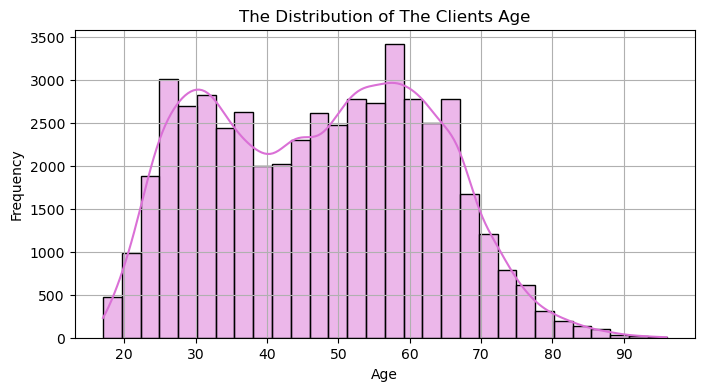

In [ ]:
# Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['clnt_age'],color='orchid', bins=30, kde=True)
plt.title('The Distribution of The Clients Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

recommendations: who are our tipical clinets 
Age_rang
compare this to the test grounp

In [ ]:
# Tenure distribution
tenure_distribution = df_merged['clnt_tenure_yr'].describe()
tenure_distribution

count    50487.000000
mean        12.031810
std          6.860326
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: clnt_tenure_yr, dtype: float64

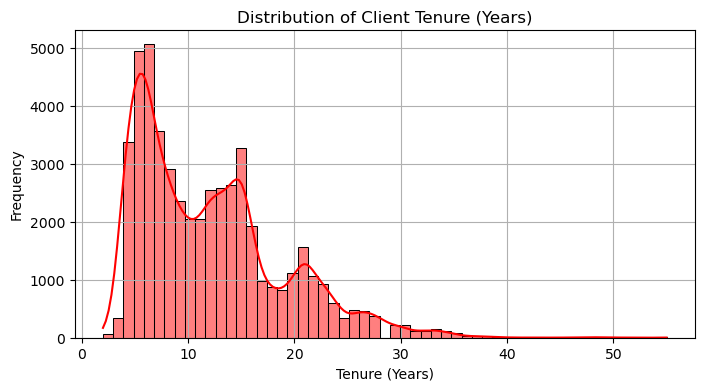

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['clnt_tenure_yr'],color='red', bins=55,kde=True )
plt.title('Distribution of Client Tenure (Years)')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Balance distribution
balance_distribution = df_merged['bal'].describe()
balance_distribution

count    5.048700e+04
mean     1.495168e+05
std      3.020390e+05
min      2.378944e+04
25%      3.987718e+04
50%      6.573433e+04
75%      1.399583e+05
max      1.632004e+07
Name: bal, dtype: float64

change from sceintific numbers to actual numbers 

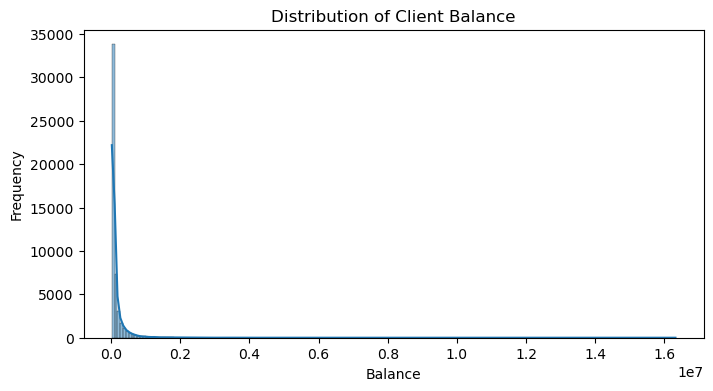

In [ ]:

plt.figure(figsize=(8, 4))
sns.histplot(df_merged['bal'], bins=200, kde=True)
plt.title('Distribution of Client Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
 #Logons distribution

logons_distribution = df_merged['logons_6_mnth'].describe()
logons_distribution

count    50487.000000
mean         6.131856
std          2.175441
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

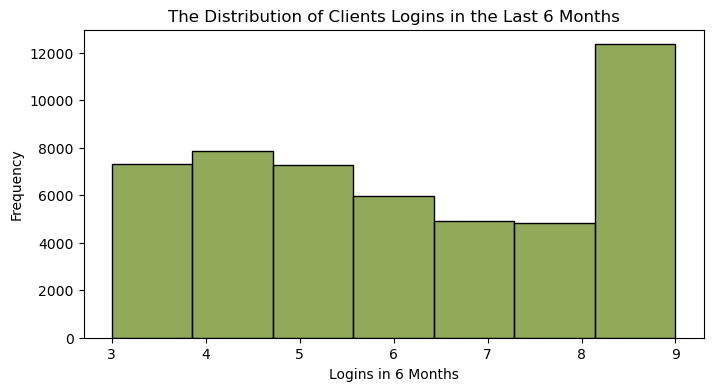

In [ ]:
# Distribution of Logins in the last 6 months
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['logons_6_mnth'],color='olivedrab', bins=7)
plt.title('The Distribution of Clients Logins in the Last 6 Months')
plt.xlabel('Logins in 6 Months')
plt.ylabel('Frequency')
plt.show()

In [ ]:
calls_distribution = df_merged['calls_6_mnth'].describe()
calls_distribution

count    50487.000000
mean         3.093272
std          2.188009
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: calls_6_mnth, dtype: float64

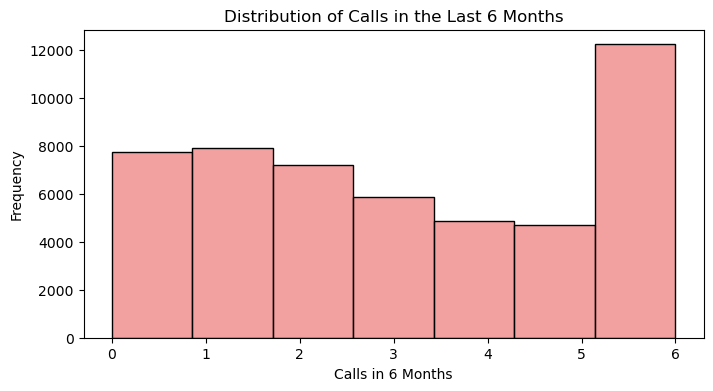

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_merged['calls_6_mnth'],color='lightcoral', bins=7)
plt.title('Distribution of Calls in the Last 6 Months')
plt.xlabel('Calls in 6 Months')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis


**Age vs. Logins**

**Age vs. Balance**

**Tenure vs. Balance**

**Number of Accounts vs. Balance**

**Gender vs. Balance**

In [ ]:
# Correlation between age and logins
age_logons_corr = df_merged[['clnt_age', 'logons_6_mnth']].corr().iloc[0, 1]
# Correlation between number of accounts and balance
accts_balance_corr = df_merged[['num_accts', 'bal']].corr().iloc[0, 1]

age_logons_corr, accts_balance_corr


(0.0566399759263761, 0.265913106895121)

**Correlation between age and logins**:0.0566399759263761

**Interpretation**: This is a very weak positive correlation between age and the number of logins in the last 6 months. It means that as age increases, the number of logins slightly increases, but the relationship is very weak and almost negligible.

**Correlation between number of accounts and balance**: 0.265913106895121

**Interpretation**: This is a weak positive correlation between the number of accounts and the balance. It means that clients with more accounts tend to have a higher balance, but the relationship is not very strong.

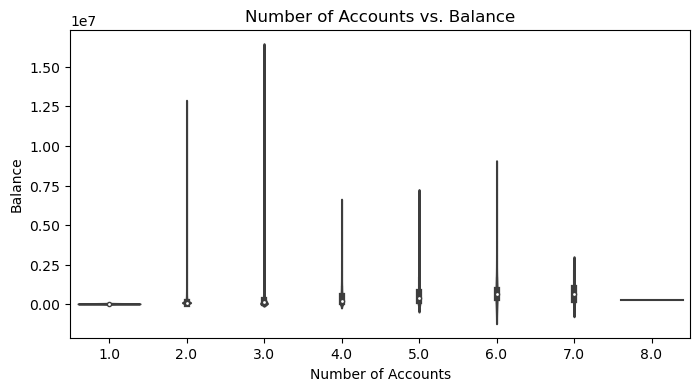

In [ ]:
# Violin plot: Number of Accounts vs. Balance
plt.figure(figsize=(8, 4))
sns.violinplot(x='num_accts', y='bal', data=df_demo_cleaned)
plt.title('Number of Accounts vs. Balance')
plt.xlabel('Number of Accounts')
plt.ylabel('Balance')
plt.show()

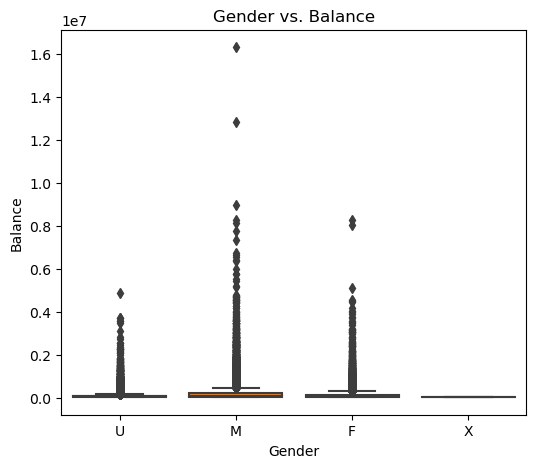

In [ ]:
# Box plot: Gender vs. Balance
plt.figure(figsize=(6, 5))
sns.boxplot(x='gendr', y='bal', data=df_demo_cleaned)
plt.title('Gender vs. Balance')
plt.xlabel('Gender')
plt.ylabel('Balance')
plt.show()

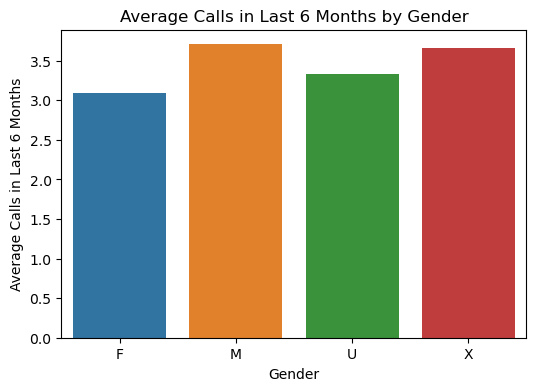

In [ ]:
# Bar plot: Gender vs. Calls in Last 6 Months
gender_calls_avg = df_demo_cleaned.groupby('gendr')['calls_6_mnth'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='gendr', y='calls_6_mnth', data=gender_calls_avg)
plt.title('Average Calls in Last 6 Months by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Calls in Last 6 Months')
plt.show()

### merging the Demo with the Web data 

In [ ]:
# Merge df_merged with df_web_data
df= pd.merge(df_merged, df_web_data, on='client_id')
df.head()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1     836976             6.0              73.0      60.5     U        2.0   
2     836976             6.0              73.0      60.5     U        2.0   
3     836976             6.0              73.0      60.5     U        2.0   
4     836976             6.0              73.0      60.5     U        2.0   

       bal  calls_6_mnth  logons_6_mnth Variation            visitor_id  \
0  45105.3           6.0            9.0      Test  427070339_1413275162   
1  45105.3           6.0            9.0      Test  427070339_1413275162   
2  45105.3           6.0            9.0      Test  427070339_1413275162   
3  45105.3           6.0            9.0      Test  427070339_1413275162   
4  45105.3           6.0            9.0      Test  427070339_1413275162   

                      visit_id process_step           date_time  
0  228976764_46825473280_96584      confirm 2017-04-02 11:51:13  
1  228976764_46825473280_96584      confirm 2017-04-02 11:47:50  
2  228976764_46825473280_96584      confirm 2017-04-02 11:46:45  
3  228976764_46825473280_96584       step_3 2017-04-02 11:23:08  
4  228976764_46825473280_96584       step_2 2017-04-02 11:22:24

In [ ]:
# Standardizing the columns names 
rename_dict = {
    'client_id': 'client_id',
    'clnt_tenure_yr': 'client_tenure_years',
    'clnt_tenure_mnth': 'client_tenure_months',
    'clnt_age': 'client_age',
    'gendr': 'gender',
    'num_accts': 'number_of_accounts',
    'bal': 'balance',
    'calls_6_mnth': 'calls_last_6_months',
    'logons_6_mnth': 'logins_last_6_months',
    'Variation': 'variation',
    'visitor_id': 'visitor_id',
    'visit_id': 'visit_id',
    'process_step': 'process_step',
    'date_time': 'date_time'
}

# Renaming columns
df.rename(columns=rename_dict, inplace=True)


# spliting the date_time column into Date column and time column. and droping the original column. 
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['time'] = pd.to_datetime(df['date_time']).dt.time
df.drop(columns=['date_time'], inplace=True)



In [ ]:
# Remove rows with NA values in the 'variation' column
df.dropna(subset=['variation'], inplace=True)

In [ ]:
# Change the data types of client id, date and time
df['client_id'] = df['client_id'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'].astype(str), format='%H:%M:%S').dt.time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321195 entries, 0 to 321194
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             321195 non-null  object        
 1   client_tenure_years   321195 non-null  float64       
 2   client_tenure_months  321195 non-null  float64       
 3   client_age            321195 non-null  float64       
 4   gender                321195 non-null  object        
 5   number_of_accounts    321195 non-null  float64       
 6   balance               321195 non-null  float64       
 7   calls_last_6_months   321195 non-null  float64       
 8   logins_last_6_months  321195 non-null  float64       
 9   variation             321195 non-null  object        
 10  visitor_id            321195 non-null  object        
 11  visit_id              321195 non-null  object        
 12  process_step          321195 non-null  object        
 13 

In [ ]:
url='../Data/Cleaned/df.csv'
df=pd.read_csv(url)
df

Unnamed: 0  client_id  client_tenure_years  client_tenure_months  \
0                0     836976                  6.0                  73.0   
1                1     836976                  6.0                  73.0   
2                2     836976                  6.0                  73.0   
3                3     836976                  6.0                  73.0   
4                4     836976                  6.0                  73.0   
...            ...        ...                  ...                   ...   
321190      321190    7468138                 18.0                 222.0   
321191      321191    7468138                 18.0                 222.0   
321192      321192    7468138                 18.0                 222.0   
321193      321193    7468138                 18.0                 222.0   
321194      321194    7468138                 18.0                 222.0   

        client_age gender  number_of_accounts    balance  calls_last_6_months  \
0             60.5      U                 2.0   45105.30                  6.0   
1             60.5      U                 2.0   45105.30                  6.0   
2             60.5      U                 2.0   45105.30                  6.0   
3             60.5      U                 2.0   45105.30                  6.0   
4             60.5      U                 2.0   45105.30                  6.0   
...            ...    ...                 ...        ...                  ...   
321190        61.0      F                 3.0  209278.15                  0.0   
321191        61.0      F                 3.0  209278.15                  0.0   
321192        61.0      F                 3.0  209278.15                  0.0   
321193        61.0      F                 3.0  209278.15                  0.0   
321194        61.0      F                 3.0  209278.15                  0.0   

        logins_last_6_months variation             visitor_id  \
0                        9.0      Test   427070339_1413275162   
1                        9.0      Test   427070339_1413275162   
2                        9.0      Test   427070339_1413275162   
3                        9.0      Test   427070339_1413275162   
4                        9.0      Test   427070339_1413275162   
...                      ...       ...                    ...   
321190                   3.0      Test  317123960_46820919455   
321191                   3.0      Test  317123960_46820919455   
321192                   3.0      Test  317123960_46820919455   
321193                   3.0      Test  317123960_46820919455   
321194                   3.0      Test  317123960_46820919455   

                            visit_id process_step            date_time  
0        228976764_46825473280_96584      confirm  2017-04-02 11:51:13  
1        228976764_46825473280_96584      confirm  2017-04-02 11:47:50  
2        228976764_46825473280_96584      confirm  2017-04-02 11:46:45  
3        228976764_46825473280_96584       step_3  2017-04-02 11:23:08  
4        228976764_46825473280_96584       step_2  2017-04-02 11:22:24  
...                              ...          ...                  ...  
321190  769876461_30381166055_830233       step_2  2017-03-30 23:59:15  
321191  769876461_30381166055_830233       step_1  2017-03-30 23:58:51  
321192  769876461_30381166055_830233        start  2017-03-30 23:58:40  
321193  769876461_30381166055_830233        start  2017-03-30 23:55:11  
321194  769876461_30381166055_830233        start  2017-03-31 00:16:12  

[321195 rows x 15 columns]

In [ ]:
df['process_step'].unique()

array(['confirm', 'step_3', 'step_2', 'step_1', 'start'], dtype=object)

In [ ]:
# calculate how many clients the company has 
unique_clients_count = df['client_id'].nunique()
unique_clients_count

50487

In [ ]:
# Calculate the number of unique clients in the test group
test_group_count = df[df['variation'] == 'Test']['client_id'].nunique()

# Calculate the number of unique clients in the control group
control_group_count = df[df['variation'] == 'Control']['client_id'].nunique()
test_group_count, control_group_count

(26961, 23526)

In [ ]:
# Calculate the percentages
test_group_percentage = (test_group_count / unique_clients_count) * 100
control_group_percentage = (control_group_count / unique_clients_count) * 100

# Display the percentages
print(f"Percentage of clients in the test group: {test_group_percentage:.2f}%")
print(f"Percentage of clients in the control group: {control_group_percentage:.2f}%")


Percentage of clients in the test group: 53.40%
Percentage of clients in the control group: 46.60%


(26961, 23526)

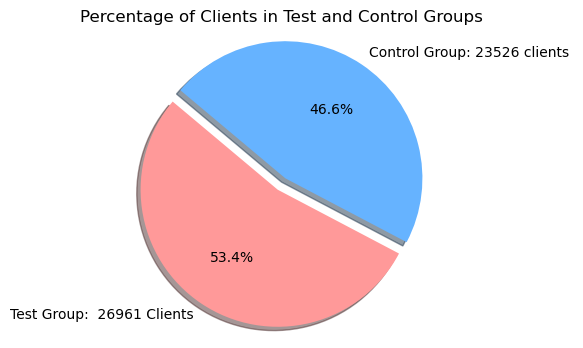

In [ ]:
# Visualize the Percentage of the Test and the control group 
labels = ['Test Group:  26961 Clients', 'Control Group: 23526 clients ']
sizes = [test_group_percentage, control_group_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Percentage of Clients in Test and Control Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

(26961, 23526)


In [ ]:
# Age distribution for the test group
age_distribution_test_group = df[df['variation'] == 'Test']['client_age'].describe()

# Age distribution for the control group
age_distribution_control_group = df[df['variation'] == 'Control']['client_age'].describe()

# Display the age distributions
print("Test Group Age Distribution:")
print(age_distribution_test_group)
print("\nControl Group Age Distribution:")
print(age_distribution_control_group)

Test Group Age Distribution:
count    177787.000000
mean         48.750018
std          15.660166
min          17.000000
25%          35.000000
50%          50.500000
75%          61.000000
max          96.000000
Name: client_age, dtype: float64

Control Group Age Distribution:
count    143408.000000
mean         48.309896
std          15.624121
min          17.000000
25%          34.500000
50%          49.500000
75%          60.500000
max          96.000000
Name: client_age, dtype: float64


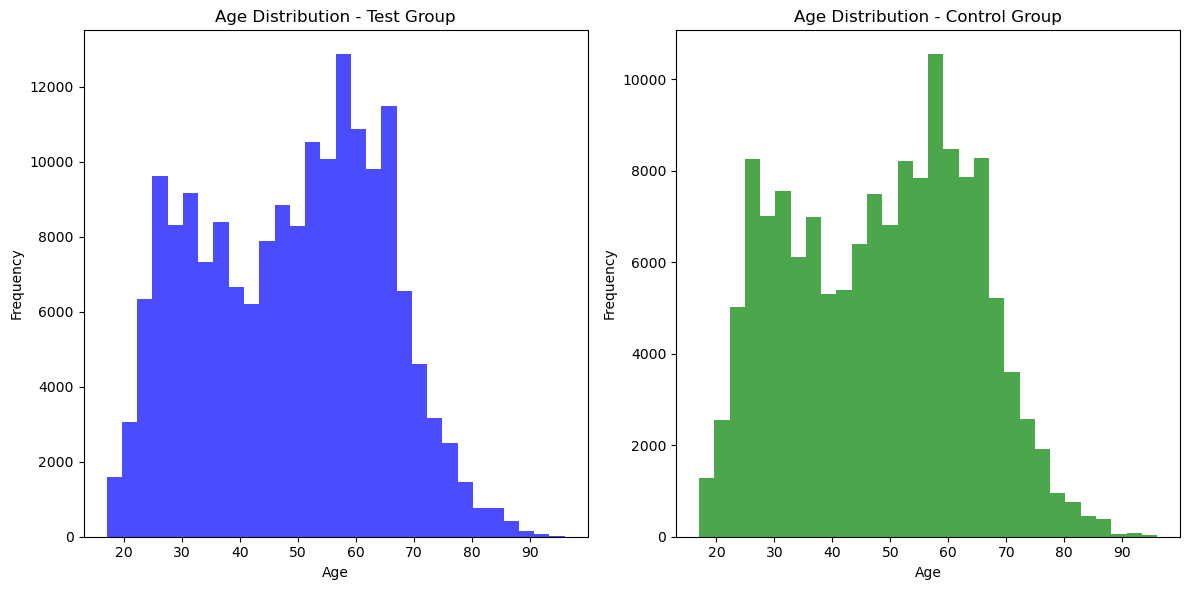

In [ ]:
import matplotlib.pyplot as plt

# Plotting the age distribution for the test group
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df[df['variation'] == 'Test']['client_age'], bins=30, color='blue', alpha=0.7)
plt.title('Age Distribution - Test Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting the age distribution for the control group
plt.subplot(1, 2, 2)
plt.hist(df[df['variation'] == 'Control']['client_age'], bins=30, color='green', alpha=0.7)
plt.title('Age Distribution - Control Group')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

processing the web page date 
come up with variable to see which page is better than the other 


### Gender Distribution in the experiment sample 

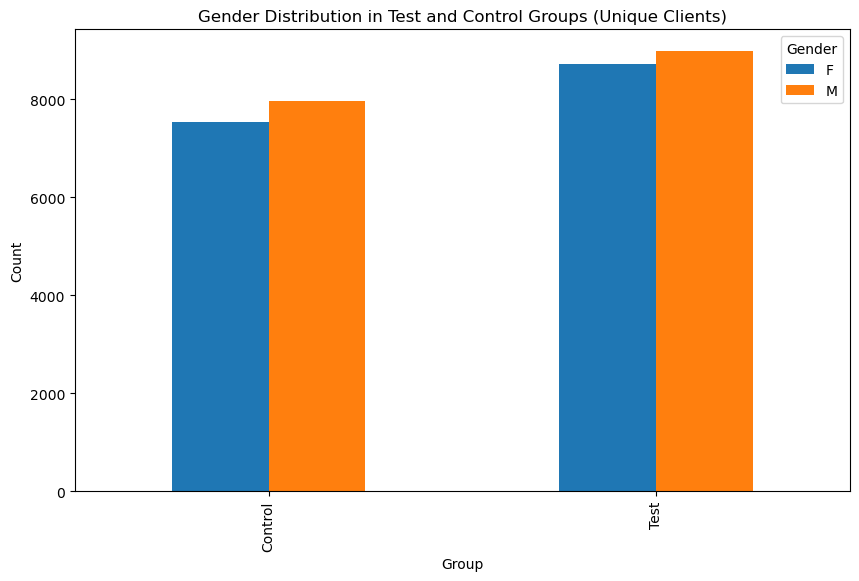

gender        F     M
variation            
Control    7542  7970
Test       8716  8977


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the dataframe for relevant columns and rows (gender 'F' and 'M' only)
df_filtered = df[df['gender'].isin(['F', 'M'])]

# Ensure calculations are based on unique client_id
unique_clients = df_filtered.drop_duplicates(subset='client_id')

# Group by variation and gender to get the counts based on unique client_id
gender_distribution_unique = unique_clients.groupby(['variation', 'gender']).size().unstack(fill_value=0)

# Plotting the results
ax_unique = gender_distribution_unique.plot(kind='bar', figsize=(10, 6))
ax_unique.set_title('Gender Distribution in Test and Control Groups (Unique Clients)')
ax_unique.set_xlabel('Group')
ax_unique.set_ylabel('Count')
ax_unique.legend(title='Gender')

# Display the plot
plt.show()

# Optionally, if you want to save the plot
# plt.savefig('gender_distribution_unique_clients.png')

# Display the dataframe to ensure correct counts
print(gender_distribution_unique)


# day 3
**1**- identify the key performance indicators (KPIs) that will determine the success of the new design.

**2**- Evaluate the New Design's Performance Compared to the Old One

**3**- Implementation Steps

In [ ]:

print("Lets start: \U0001F600") 


Lets start: ðŸ˜€


In [ ]:
df.head(5)

Unnamed: 0  client_id  client_tenure_years  client_tenure_months  \
0           0     836976                  6.0                  73.0   
1           1     836976                  6.0                  73.0   
2           2     836976                  6.0                  73.0   
3           3     836976                  6.0                  73.0   
4           4     836976                  6.0                  73.0   

   client_age gender  number_of_accounts  balance  calls_last_6_months  \
0        60.5      U                 2.0  45105.3                  6.0   
1        60.5      U                 2.0  45105.3                  6.0   
2        60.5      U                 2.0  45105.3                  6.0   
3        60.5      U                 2.0  45105.3                  6.0   
4        60.5      U                 2.0  45105.3                  6.0   

   logins_last_6_months variation            visitor_id  \
0                   9.0      Test  427070339_1413275162   
1                   9.0      Test  427070339_1413275162   
2                   9.0      Test  427070339_1413275162   
3                   9.0      Test  427070339_1413275162   
4                   9.0      Test  427070339_1413275162   

                      visit_id process_step            date_time  
0  228976764_46825473280_96584      confirm  2017-04-02 11:51:13  
1  228976764_46825473280_96584      confirm  2017-04-02 11:47:50  
2  228976764_46825473280_96584      confirm  2017-04-02 11:46:45  
3  228976764_46825473280_96584       step_3  2017-04-02 11:23:08  
4  228976764_46825473280_96584       step_2  2017-04-02 11:22:24

### Hypothesis 1 - The New Website Drives More Confirmations








In [ ]:
import pandas as pd


# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Filter data for the experiment timeframe
experiment_start = pd.Timestamp('2017-03-15')
experiment_end = pd.Timestamp('2017-06-20')
df_experiment = df[(df['date_time'] >= experiment_start) & (df['date_time'] <= experiment_end)]

# Hypothesis 1: The new website drives more confirmations
# Extract unique clients for completion rates
completion_df = df_experiment[df_experiment['process_step'] == 'confirm'].drop_duplicates(subset='client_id')

# Number of completions in each group
completions_control = completion_df[completion_df['variation'] == 'Control']['client_id'].nunique()
completions_test = completion_df[completion_df['variation'] == 'Test']['client_id'].nunique()

# Number of clients in each group
clients_control = df_experiment[df_experiment['variation'] == 'Control']['client_id'].nunique()
clients_test = df_experiment[df_experiment['variation'] == 'Test']['client_id'].nunique()

# Proportions
completion_rate_control = completions_control / clients_control
completion_rate_test = completions_test / clients_test

# Perform two-proportion z-test
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = np.array([completions_test, completions_control])
nobs = np.array([clients_test, clients_control])
stat, pval = proportions_ztest(count, nobs)

# Display the results for Hypothesis 1
completion_results = {
    'completion_rate_test': completion_rate_test,
    'completion_rate_control': completion_rate_control,
    'z_statistic': stat,
    'p_value': pval
}


# Completion Rates Pie Chart for Test Group
fig, ax = plt.subplots()
ax.pie([completion_rate_test, 1 - completion_rate_test], labels=['Test Group', 'Other'], autopct='%1.1f%%', startangle=90)
ax.set_title('Completion Rates - Test Group')

plt.show()

# Completion Rates Pie Chart for Control Group
fig, ax = plt.subplots()
ax.pie([completion_rate_control, 1 - completion_rate_control], labels=['Control Group', 'Other'], autopct='%1.1f%%', startangle=90)
ax.set_title('Completion Rates - Control Group')
plt.show()

completion_results

NameError: name 'df' is not defined

In [ ]:
completion_rate_control

NameError: name 'completion_rate_control' is not defined

### Take away rom Hypothesis 1 

The completion rate for the test group (new website) is higher than that of the control group (old website).
The Z-statistic is 9.08, indicating a significant difference between the two groups.
The extremely low p-value  suggests that this difference is statistically significant, meaning that the new website has a positive impact on the completion rate.


### Hypothesis 2 - Clients in the New Website Face Fewer Errors

In [8]:
# Define error as clients jumping between steps without confirming
clients_with_errors = df_experiment[df_experiment.duplicated(subset=['client_id', 'process_step'], keep=False)]
error_clients = clients_with_errors[~clients_with_errors['client_id'].isin(completion_df['client_id'])]

# Number of errors in each group
errors_control = error_clients[error_clients['variation'] == 'Control']['client_id'].nunique()
errors_test = error_clients[error_clients['variation'] == 'Test']['client_id'].nunique()

# Proportions
error_rate_control = errors_control / clients_control
error_rate_test = errors_test / clients_test

# Perform two-proportion z-test
count_errors = np.array([errors_test, errors_control])
stat_errors, pval_errors = proportions_ztest(count_errors, nobs)

# Save the results for Hypothesis 2
error_results = {
    'error_rate_test': error_rate_test,
    'error_rate_control': error_rate_control,
    'z_statistic': stat_errors,
    'p_value': pval_errors
}
# Error Rates Pie Chart for Test Group
fig, ax = plt.subplots()
ax.pie([error_rate_test, 1 - error_rate_test], labels=['Test Group', 'Other'], autopct='%1.1f%%', startangle=90)
ax.set_title('Error Rates - Test Group')

plt.show()

# Error Rates Pie Chart for Control Group
fig, ax = plt.subplots()
ax.pie([error_rate_control, 1 - error_rate_control], labels=['Control Group', 'Other'], autopct='%1.1f%%', startangle=90)
ax.set_title('Error Rates - Control Group')

plt.show()
error_results




NameError: name 'df_experiment' is not defined

### take away rom Hypothesis 2 

The error rate for the test group (new website) is higher than that of the control group (old website).
The Z-statistic is 6.09, indicating a significant difference between the two groups.
The very low p-value suggests that this difference is statistically significant, meaning that the new website has a higher error rate.


Negative Impact: The new website has a higher error rate, which indicates users are encountering more difficulties or issues.

Actionable Insight: Identify and address the root causes of the increased error rate. This could involve usability testing, bug fixing, or user feedback to improve the website.

Next Steps: Conduct further analysis to pinpoint specific areas or features of the new website that are causing the errors. Implement changes and reassess the error rate to ensure improvements are effective.


### recommendations 

Recommendations:

Enhance Usability: Conduct usability testing to identify pain points and improve the user interface.

Fix Technical Bugs: Analyze error logs to find and fix technical issues causing the higher error rate.

Gather User Feedback: Survey users to understand their challenges and improve the website based on their feedback.

Continuous Monitoring: Keep monitoring both completion and error rates after making improvements to ensure that changes are effective and the website performance continues to improve.








### Combine results of hypothesis into a datafram

In [ ]:
# Combine results into a dataframe
results = {
    'Hypothesis': ['Completion Rate', 'Completion Rate', 'Error Rate', 'Error Rate'],
    'Group': ['Test', 'Control', 'Test', 'Control'],
    'Value': [completion_rate_test, completion_rate_control, error_rate_test, error_rate_control],
    'Z-Statistic': [stat, stat, stat_errors, stat_errors],
    'P-Value': [pval, pval, pval_errors, pval_errors]
}

hypothesis_testing = pd.DataFrame(results)


hypothesis_testing 

Hypothesis    Group     Value  Z-Statistic       P-Value
0  Completion Rate     Test  0.692740     9.082361  1.062450e-19
1  Completion Rate  Control  0.654701     9.082361  1.062450e-19
2       Error Rate     Test  0.207446     6.090596  1.124912e-09
3       Error Rate  Control  0.185769     6.090596  1.124912e-09

## Hypothesis 3: The New Website Drives Clients to Log In More Frequently


Steps:
* Load the Dataset and Filter by Timeframe.
* Extract Logins Data for Both Groups.
* Perform a T-Test to Compare Means.
* Save Results in a DataFrame.
* Visualize Results with a Bar Chart.


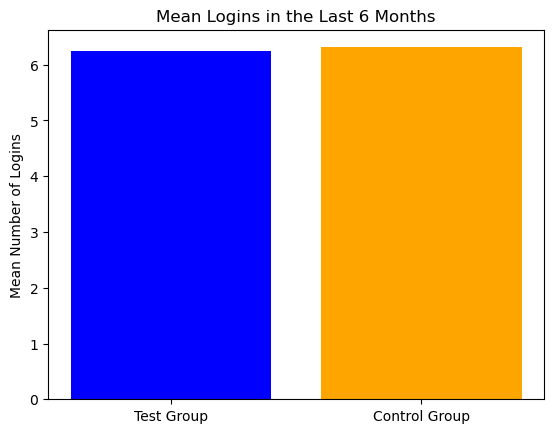

Metric    Test Group  Control Group
0  Mean Logins  6.246394e+00   6.313193e+00
1  T-Statistic -8.615469e+00  -8.615469e+00
2      P-Value  6.997878e-18   6.997878e-18

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt



# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Filter data for the experiment timeframe
experiment_start = pd.Timestamp('2017-03-15')
experiment_end = pd.Timestamp('2017-06-20')
df_experiment = df[(df['date_time'] >= experiment_start) & (df['date_time'] <= experiment_end)]

# Extract logins data for both groups
logins_control = df_experiment[df_experiment['variation'] == 'Control']['logins_last_6_months']
logins_test = df_experiment[df_experiment['variation'] == 'Test']['logins_last_6_months']

# Perform t-test to compare means
t_stat, p_val = ttest_ind(logins_test, logins_control, equal_var=False)

# Calculate mean logins for both groups
mean_logins_test = logins_test.mean()
mean_logins_control = logins_control.mean()

# Save the results in a new dataframe
results = {
    'Metric': ['Mean Logins', 'T-Statistic', 'P-Value'],
    'Test Group': [mean_logins_test, t_stat, p_val],
    'Control Group': [mean_logins_control, t_stat, p_val]
}

login_testing_results = pd.DataFrame(results)

# Save the results to a CSV file
login_testing_results.to_csv('login_testing_results.csv',encoding='utf8',sep=';' )

# Visualize the results with a bar chart
fig, ax = plt.subplots()
groups = ['Test Group', 'Control Group']
means = [mean_logins_test, mean_logins_control]
ax.bar(groups, means, color=['blue', 'orange'])
ax.set_title('Mean Logins in the Last 6 Months')
ax.set_ylabel('Mean Number of Logins')

plt.show()


login_testing_results.head()


### take away from the Hypothesis 

* Mean Logins: The mean number of logins in the last 6 months is slightly lower in the test group (6.25) compared to the control group (6.31).
* T-Statistic: The t-statistic is -8.62, indicating a significant difference between the two groups.
* P-Value: The extremely low p-value suggests that this difference is statistically significant.

Takeaways:

* Negative Impact: Contrary to the hypothesis, the new website does not drive more frequent logins. In fact, it shows a slight decrease in the mean number of logins.

* Actionable Insight: Investigate the reasons why the new website might be leading to fewer logins. This could involve user feedback, usability studies, or technical performance analysis.

* Next Steps: Consider making adjustments to the new website to enhance user engagement, and monitor the login frequency after implementing changes to assess improvement.


### Hypothesis4 : The New Website Improves User Efficiency by Reducing Time Spent on Each Step


To test this hypothesis, we will:

* Calculate the average time spent on each step for both the control and test groups.
* Compare the average times to determine if there is a significant reduction in the test group.

Steps:
* Load the Dataset and Filter by Timeframe
* Calculate the Time Difference Between Steps
* Calculate the Average Time Spent on Each Step for Both Groups
* Perform Statistical Test (T-Test) to Compare Times
* Save Results in a DataFrame
* Visualize Results

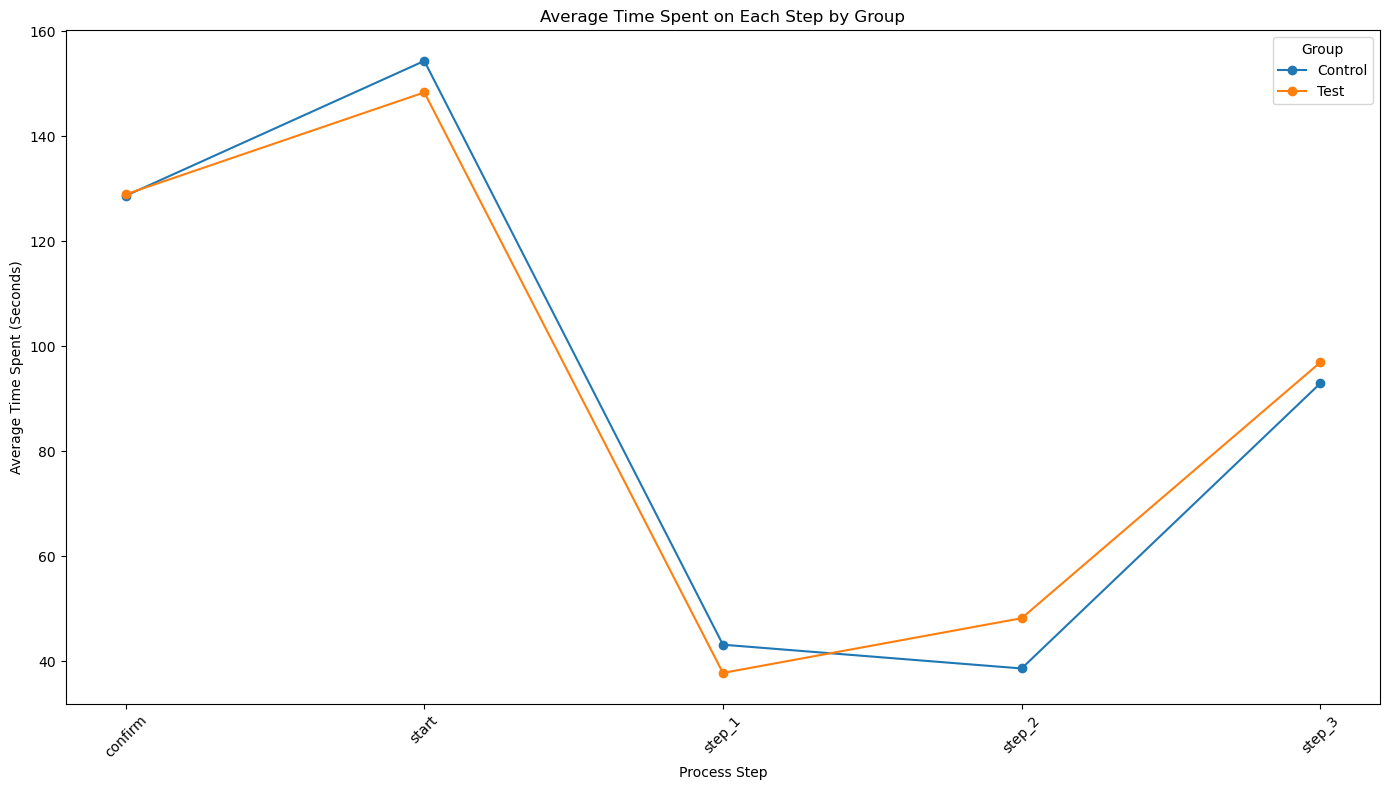

process_step  t_statistic       p_value
0      confirm     0.128899  8.974379e-01
1        start    -1.301314  1.931617e-01
2       step_1    -6.923763  4.439635e-12
3       step_2    13.603505  4.482617e-42
4       step_3     3.635119  2.781433e-04

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Filter data for the experiment timeframe
experiment_start = pd.Timestamp('2017-03-15')
experiment_end = pd.Timestamp('2017-06-20')
df_experiment = df[(df['date_time'] >= experiment_start) & (df['date_time'] <= experiment_end)]

# Sort the data by visit_id and date_time to calculate the time difference between steps
df_experiment = df_experiment.sort_values(by=['visit_id', 'date_time'])

# Calculate the time difference between consecutive steps
df_experiment['time_diff'] = df_experiment.groupby('visit_id')['date_time'].diff()

# Convert time_diff to seconds
df_experiment['time_diff_seconds'] = df_experiment['time_diff'].dt.total_seconds()

# Calculate the average time spent on each step based on visit_id and variation (control or test)
avg_time_per_step = df_experiment.groupby(['variation', 'process_step'])['time_diff_seconds'].mean().reset_index()

# Separate the test and control groups
test_group = df_experiment[df_experiment['variation'] == 'Test']
control_group = df_experiment[df_experiment['variation'] == 'Control']

# Perform t-test to compare times for each step
steps = avg_time_per_step['process_step'].unique()
t_test_results = []

for step in steps:
    test_times = test_group[test_group['process_step'] == step]['time_diff_seconds'].dropna()
    control_times = control_group[control_group['process_step'] == step]['time_diff_seconds'].dropna()
    t_stat, p_val = ttest_ind(test_times, control_times, equal_var=False)
    t_test_results.append({'process_step': step, 't_statistic': t_stat, 'p_value': p_val})

# Save the t-test results in a dataframe
t_test_results_df = pd.DataFrame(t_test_results)

# Save the average time per step results to a CSV file
avg_time_per_step.to_csv('avg_time_per_step.csv')
t_test_results_df.to_csv('t_test_results.csv')

# Visualize the average time spent on each step
fig, ax = plt.subplots(figsize=(14, 8))
for label, df_group in avg_time_per_step.groupby('variation'):
    ax.plot(df_group['process_step'], df_group['time_diff_seconds'], marker='o', label=label)

ax.set_title('Average Time Spent on Each Step by Group')
ax.set_xlabel('Process Step')
ax.set_ylabel('Average Time Spent (Seconds)')
ax.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



avg_time_per_step.head()
t_test_results_df.head()


#### Take away from Hypothesis 4 
**Step 1 Improvement:** The test group spends significantly less time on step 1, suggesting that the new website has improved user efficiency for this step.

**Step 2 and Step 3 Issues:** The test group spends significantly more time on steps 2 and 3, indicating potential usability issues or confusion in these steps.

**No Significant Difference in Confirm and Start Steps:** There is no significant difference in the time spent on the confirm and start steps, suggesting that the new website did not impact these steps.

## Hypothesis 5:
#### Males confirm more often than females in both the test and control groups.



to test the Hypothesis, i will perform the follwoing: 


* Filter Data: Filter the data to include only rows where process_step is "confirm".
* Calculate Confirmation Counts for Each Group: Calculate the number of confirmations for each gender in both the test and control groups.
* Calculate Percentages: Calculate the percentage of confirmations for each gender within each group.
* Summarize Data: Create summary dataframes with counts and percentages for each group.
* Visualize Data: Visualize the confirmation counts and percentages using bar and pie charts for each group.
* Hypothesis Testing: Use the chi-square test to determine if there is a significant difference in confirmation rates between genders.
* Analyze Results: Analyze the results to confirm or disprove the hypothesis.


Test Group - Confirmation counts and percentages by gender:
        Count  Percentage
gender                   
M        8963   52.259343
F        8188   47.740657

Control Group - Confirmation counts and percentages by gender:
        Count  Percentage
gender                   
M        6039   52.186312
F        5533   47.813688


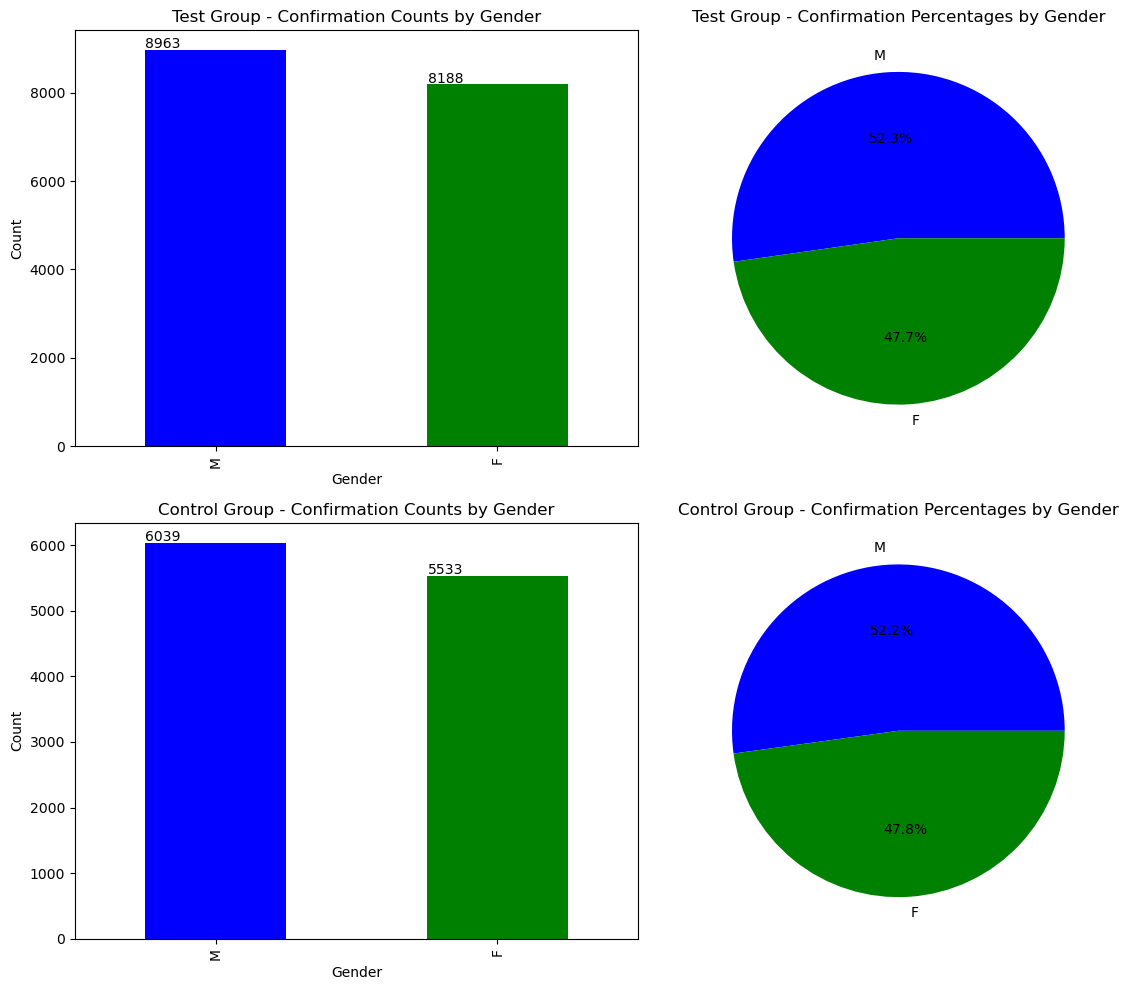

Chi-square test for the test group: chi2 = 0.0, p-value = 1.0
Chi-square test for the control group: chi2 = 0.0, p-value = 1.0
There is no significant difference in confirmation rates between genders in the test group.
There is no significant difference in confirmation rates between genders in the control group.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency



# Filter the dataframe for rows where process_step is 'confirm' and gender is 'M' or 'F'
df_confirm = df[(df['process_step'] == 'confirm') & (df['gender'].isin(['M', 'F']))]

# Calculate the number of confirmations by gender for the test group
confirmation_counts_test = df_confirm[df_confirm['variation'] == 'Test']['gender'].value_counts()

# Calculate the number of confirmations by gender for the control group
confirmation_counts_control = df_confirm[df_confirm['variation'] == 'Control']['gender'].value_counts()

# Calculate the percentages for the test group
total_confirmations_test = confirmation_counts_test.sum()
confirmation_percentages_test = (confirmation_counts_test / total_confirmations_test) * 100

# Calculate the percentages for the control group
total_confirmations_control = confirmation_counts_control.sum()
confirmation_percentages_control = (confirmation_counts_control / total_confirmations_control) * 100

# Create dataframes with counts and percentages for the test group
confirmation_summary_test = pd.DataFrame({
    'Count': confirmation_counts_test,
    'Percentage': confirmation_percentages_test
})

# Create dataframes with counts and percentages for the control group
confirmation_summary_control = pd.DataFrame({
    'Count': confirmation_counts_control,
    'Percentage': confirmation_percentages_control
})

# Print the summaries
print("Test Group - Confirmation counts and percentages by gender:")
print(confirmation_summary_test)
print("\nControl Group - Confirmation counts and percentages by gender:")
print(confirmation_summary_control)

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart for confirmation counts by gender - Test Group
confirmation_summary_test['Count'].plot(kind='bar', ax=ax[0, 0], color=['blue', 'green'])
ax[0, 0].set_title('Test Group - Confirmation Counts by Gender')
ax[0, 0].set_xlabel('Gender')
ax[0, 0].set_ylabel('Count')
for p in ax[0, 0].patches:
    ax[0, 0].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Pie chart for confirmation percentages by gender - Test Group
confirmation_summary_test['Percentage'].plot(kind='pie', ax=ax[0, 1], autopct='%1.1f%%', colors=['blue', 'green'])
ax[0, 1].set_title('Test Group - Confirmation Percentages by Gender')
ax[0, 1].set_ylabel('')

# Bar chart for confirmation counts by gender - Control Group
confirmation_summary_control['Count'].plot(kind='bar', ax=ax[1, 0], color=['blue', 'green'])
ax[1, 0].set_title('Control Group - Confirmation Counts by Gender')
ax[1, 0].set_xlabel('Gender')
ax[1, 0].set_ylabel('Count')
for p in ax[1, 0].patches:
    ax[1, 0].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Pie chart for confirmation percentages by gender - Control Group
confirmation_summary_control['Percentage'].plot(kind='pie', ax=ax[1, 1], autopct='%1.1f%%', colors=['blue', 'green'])
ax[1, 1].set_title('Control Group - Confirmation Percentages by Gender')
ax[1, 1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Perform chi-square test for the test group
contingency_test = pd.crosstab(df_confirm[df_confirm['variation'] == 'Test']['gender'],
                               df_confirm[df_confirm['variation'] == 'Test']['process_step'])
chi2_test, p_test, _, _ = chi2_contingency(contingency_test)
print(f"Chi-square test for the test group: chi2 = {chi2_test}, p-value = {p_test}")

# Perform chi-square test for the control group
contingency_control = pd.crosstab(df_confirm[df_confirm['variation'] == 'Control']['gender'],
                                  df_confirm[df_confirm['variation'] == 'Control']['process_step'])
chi2_control, p_control, _, _ = chi2_contingency(contingency_control)
print(f"Chi-square test for the control group: chi2 = {chi2_control}, p-value = {p_control}")

# Analysis of results
if p_test < 0.05:
    print("There is a significant difference in confirmation rates between genders in the test group.")
else:
    print("There is no significant difference in confirmation rates between genders in the test group.")

if p_control < 0.05:
    print("There is a significant difference in confirmation rates between genders in the control group.")
else:
    print("There is no significant difference in confirmation rates between genders in the control group.")


Analysis:
In both the test and control groups, the percentage of confirmations by males is slightly higher than that by females.

The percentage of female confirmations in the test group (47.74%) is slightly lower than in the control group (47.81%).

The new website did not significantly change the gender distribution of confirmations. Both before and after the change, males confirmed slightly more often than females.

The percentage of female confirmations did not increase in the test group compared to the control group, so the new website design does not appear to have driven more women to confirm.


# Experiment evalutation 

Key Findings:
**1. Completion Rate:**
*Test Group: 69.27%
*Control Group: 65.47%
* Significance: The completion rate for the test group is significantly higher, indicating that the new website successfully drives more users to complete the process.

**2. Error Rate:**
*Test Group: 20.74%
*Control Group: 18.58%
* Significance: The error rate for the test group is significantly higher, suggesting that users encounter more difficulties or issues on the new website.

**3. Login Frequency:**

*Test Group: 6.25 logins (mean)
*Control Group: 6.31 logins (mean)
* Significance: There is no significant difference in the login frequency between the test and control groups, implying that the new website does not significantly impact user login behavior.

**4. Time Spent on Each Step:**

Step 1: Users in the test group spend significantly less time, indicating improved efficiency.
Steps 2 and 3: Users in the test group spend significantly more time, suggesting potential usability issues.
Confirm and Start Steps: No significant difference, indicating no impact from the new website on these steps.

#### Recommendations:

**Positive Improvements:**
*Increased Completion Rate: The new website effectively drives more completions. This is a major positive indicator and suggests that some elements of the new website are more user-friendly or effective in guiding users to complete their actions.

**Areas for Improvement:**
* High Error Rate: The higher error rate indicates that users encounter more issues on the new website.
* Conduct usability testing and gather user feedback to identify and address these issues.
* Time Spent on Steps 2 and 3: The increased time spent on these steps suggests potential confusion or usability problems. Investigate these steps through user testing and feedback to understand the specific issues and make necessary improvements.

**Next Steps:**

Conduct Usability Testing: Perform detailed usability tests focusing on steps 2 and 3 to identify the root causes of the increased time spent and higher error rates.

Gather User Feedback: Collect feedback from users who have interacted with the new website to understand their pain points and suggestions for improvements.

Iterate and Improve: Based on the findings from usability testing and user feedback, make iterative improvements to the new website. Focus on reducing errors and improving user efficiency in steps 2 and 3.

Monitor Key Metrics: Continuously monitor the key metrics (completion rate, error rate, login frequency, and time spent on each step) to ensure that the improvements have the desired effect and that the website's performance continues to improve.

Training and Support: Consider providing additional training or support resources for users to help them navigate the new website more effectively.

## Conclusion:
The new website shows promising improvements in completion rates but also highlights areas that need attention, particularly in reducing errors and improving user efficiency in specific steps. By focusing on these areas, the overall user experience can be enhanced, leading to even better performance metrics.

Would you like to proceed with implementing these recommendations or need further detailed analysis on any specific aspect?







